In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:

insurance_dataset.replace({'sex':{'male':1,'female':0}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [5]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [6]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, Y_train)

GradientBoostingRegressor()

In [7]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
print(r2_score(Y_test,y_pred))

0.8681881529473322


In [8]:
import pickle
with open('insurance_cost.pkl','wb') as files:
    pickle.dump(regressor,files)

In [9]:
nonnum_cols=[col for col in insurance_dataset.select_dtypes(include=["object"])]

age :  0.2990081933306475
sex :  0.05729206220202531
bmi :  0.19834096883362876
children :  0.06799822684790464
smoker :  0.7872514304984778
region :  0.056992781092419245
charges :  0.9999999999999994


Text(0, 0.5, 'Absolute correlation')

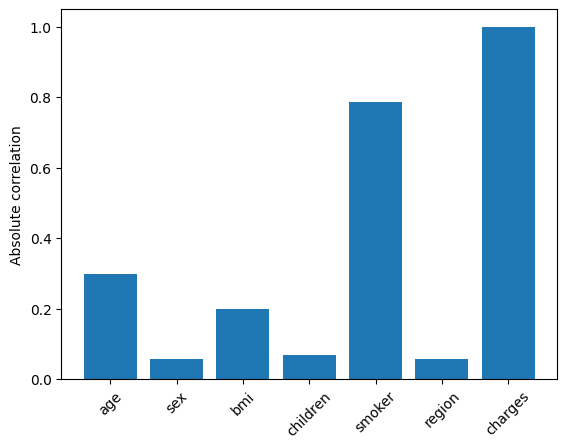

In [14]:
corr_vals=[]
collabel=[]
for col in [i for i in insurance_dataset.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(insurance_dataset[col],insurance_dataset["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")